In [1]:
import sys
import os
import torch
import cv2 as cv
import numpy as np
import torchvision
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data
import torchvision.datasets as dset
import torchvision.utils as vutils
from torch.utils.data import DataLoader, Dataset
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import random
from torch.utils.data.sampler import SubsetRandomSampler
from PIL import Image
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Using GPU
print(sys.version)
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'
#Checking for GPU
print(torch.version.cuda)
print(torch.cuda.device_count())
print(torch.cuda.is_available())

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
10.1
1
True


In [4]:
lookup1 = dict() #direction
reverselookup1 = dict()
lookup2 = dict() #expression
reverselookup2 = dict()
lookup3 = dict() #sunglasses
reverselookup3 = dict()

for i, j in enumerate(os.listdir('drive/My Drive/Advanced_Assignment_Dataset/')):
  if not j.startswith('.'):
    filename = str(j).split('.')[0]
    attributes = filename.split('_')[:3]
    #print(i, attributes)

    if attributes[0] not in lookup1:
      lookup1[attributes[0]] = len(lookup1)
      reverselookup1[len(lookup1)-1] = attributes[0]

    if attributes[1] not in lookup2:
      lookup2[attributes[1]] = len(lookup2)
      reverselookup2[len(lookup2)-1] = attributes[1]

    if attributes[2] not in lookup3:
      lookup3[attributes[2]] = len(lookup3)
      reverselookup3[len(lookup3)-1] = attributes[2]

        
print(lookup1, lookup2, lookup3)
print(reverselookup1, reverselookup2, reverselookup3)

{'left': 0, 'right': 1, 'straight': 2, 'up': 3} {'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3} {'open': 0, 'sunglasses': 1}
{0: 'left', 1: 'right', 2: 'straight', 3: 'up'} {0: 'angry', 1: 'happy', 2: 'neutral', 3: 'sad'} {0: 'open', 1: 'sunglasses'}


In [5]:
sample = cv.imread('drive/My Drive/Advanced_Assignment_Dataset/up_sad_sunglasses_19.pgm')
print(sample.dtype, sample.shape)

uint8 (120, 128, 3)


In [26]:
num_classes1 = len(lookup1)
num_classes2 = len(lookup2)
num_classes3 = len(lookup3)

path = 'drive/My Drive/Advanced_Assignment_Dataset/'

image_size = sample.shape
h = image_size[1]

transform = transforms.Compose([
                transforms.Resize((h, h)),
                transforms.RandomResizedCrop(size=h, scale=(0.95, 1.05)),
                transforms.ColorJitter(),
                transforms.ToTensor(), 
                transforms.Normalize([0.5], [0.5])
                ])

labels = []
image_set = []
img = None

for j in tqdm(os.listdir('drive/My Drive/Advanced_Assignment_Dataset/')):
  img = cv.imread(path+str(j), 0)
  img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
  #img = cv.resize(img, (h, h), cv.INTER_AREA)
  img = Image.fromarray(img)
  img = transform(img)
  #print(img.shape)

  image_set.append(img)
  attributes=[]
  filename = (str(j).split('.')[0]).split('_')[:3]
  attributes.append(lookup1[filename[0]])
  attributes.append(lookup2[filename[1]])
  attributes.append(lookup3[filename[2]])

  labels.append(attributes)
  print('.', end=' ')
plt.show()
#for i in labels:
  #print(i)

print(len(labels))

  7%|▋         | 47/632 [00:00<00:02, 227.97it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 15%|█▌        | 95/632 [00:00<00:02, 233.20it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 23%|██▎       | 145/632 [00:00<00:02, 240.50it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 31%|███       | 197/632 [00:00<00:01, 246.81it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 39%|███▉      | 249/632 [00:01<00:01, 250.99it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 47%|████▋     | 299/632 [00:01<00:01, 240.67it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 51%|█████     | 323/632 [00:01<00:01, 231.85it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 59%|█████▉    | 374/632 [00:01<00:01, 239.91it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 67%|██████▋   | 424/632 [00:01<00:00, 241.45it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 75%|███████▌  | 476/632 [00:01<00:00, 247.24it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 83%|████████▎ | 527/632 [00:02<00:00, 246.16it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 91%|█████████▏| 578/632 [00:02<00:00, 244.87it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

100%|██████████| 632/632 [00:02<00:00, 242.58it/s]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 632


In [7]:
class GestureDataset(Dataset):
    """Dynamic Gesture dataset."""

    def __init__(self, images, labels, num_classes1=4, num_classes2=4, num_classes3=2):

        self.images = images
        self.labels = labels
        self.num_classes1 = num_classes1
        self.num_classes2 = num_classes2
        self.num_classes3 = num_classes3
        #self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = np.array(self.labels[idx])

        return (image, label)

dataset = GestureDataset(image_set, labels)
print(dataset[0], dataset[0][0].shape)


(tensor([[[-0.4824, -0.4824, -0.4745,  ..., -0.4196, -0.4196, -0.4196],
         [-0.4980, -0.4824, -0.4824,  ..., -0.4039, -0.4039, -0.4196],
         [-0.4824, -0.4824, -0.4745,  ..., -0.4196, -0.4196, -0.4039],
         ...,
         [-0.8902, -0.6706, -0.6000,  ..., -0.7961, -0.8039, -0.8039],
         [-0.8824, -0.6235, -0.5922,  ..., -0.8745, -0.8902, -0.8980],
         [-0.8275, -0.5922, -0.5922,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.4824, -0.4824, -0.4745,  ..., -0.4196, -0.4196, -0.4196],
         [-0.4980, -0.4824, -0.4824,  ..., -0.4039, -0.4039, -0.4196],
         [-0.4824, -0.4824, -0.4745,  ..., -0.4196, -0.4196, -0.4039],
         ...,
         [-0.8902, -0.6706, -0.6000,  ..., -0.7961, -0.8039, -0.8039],
         [-0.8824, -0.6235, -0.5922,  ..., -0.8745, -0.8902, -0.8980],
         [-0.8275, -0.5922, -0.5922,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.4824, -0.4824, -0.4745,  ..., -0.4196, -0.4196, -0.4196],
         [-0.4980, -0.4824, -0.4824,  ..., -

In [8]:
random_seed = random.randint(1, 100)
batch = 4

dataset_size = len(dataset)
split = int(0.05*dataset_size)
print('Size of dataset is: ', dataset_size)
print('Split values are: ', split, split)
indices = list(range(dataset_size))

np.random.seed(random_seed)
np.random.shuffle(indices)

train_indices, val_indices, test_indices = indices[split*2:], indices[:split], indices[split:split*2]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch, sampler=train_sampler,
                                            num_workers = 2)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch, sampler=valid_sampler,
                                            num_workers = 2)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch, sampler=test_sampler,
                                            num_workers = 2)



Size of dataset is:  632
Split values are:  31 31


In [9]:
'''class MultiClassifier(nn.Module):
  def __init__(self):
    super(MultiClassifier, self).__init__()
    self.ConvLayer1 = nn.Sequential(
      nn.Conv2d(3, 64, kernel_size = 3, stride = 1, padding = 1), # 3, 128, 128
      nn.ReLU(), # op: 64, 128, 128
    )
    self.ConvLayer2 = nn.Sequential(
      nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1), # 128, 128, 128
      nn.MaxPool2d(kernel_size = 2, stride = 2), #op: 128, 64, 64
      nn.ReLU() # op: 128, 64, 64
    )
    self.ConvLayer3 = nn.Sequential(
      nn.Conv2d(128, 128, kernel_size = 3, stride = 1, padding = 1), # 256, 64, 64
      nn.ReLU() #op: 256, 64, 64
    )
    self.ConvLayer4 = nn.Sequential(
      nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1), # 256, 64, 64
      nn.MaxPool2d(kernel_size = 2, stride = 2), #op: 256, 32, 32
      nn.ReLU() #op: 256, 32, 32
    )
    self.ConvLayer6 = nn.Sequential(
      nn.Conv2d(256, 512, kernel_size = 5, stride = 1, padding = 2), # 512, 32, 32
      nn.MaxPool2d(kernel_size = 2, stride = 2), #op: 512, 16, 16
      nn.ReLU(), #op: 512, 16, 16
      nn.Dropout(0.2)
    )
    self.Linear1 = nn.Linear(512 * 16 * 16, 512)
    self.drop1 = nn.Dropout(0.25)
    self.Linear2 = nn.Linear(512, 3)
  def forward(self, x):
    x = self.ConvLayer1(x)
    x = self.ConvLayer2(x)
    x = self.ConvLayer3(x)
    x = self.ConvLayer4(x)
    #x = self.ConvLayer5(x)
    x = self.ConvLayer6(x)
    
    x = x.view(x.size(0), -1)
    x = self.Linear1(x)
    x = self.drop1(x)
    #x = self.Linear2(x)
    x = self.Linear2(x)
    return F.sigmoid(x)'''

'class MultiClassifier(nn.Module):\n  def __init__(self):\n    super(MultiClassifier, self).__init__()\n    self.ConvLayer1 = nn.Sequential(\n      nn.Conv2d(3, 64, kernel_size = 3, stride = 1, padding = 1), # 3, 128, 128\n      nn.ReLU(), # op: 64, 128, 128\n    )\n    self.ConvLayer2 = nn.Sequential(\n      nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1), # 128, 128, 128\n      nn.MaxPool2d(kernel_size = 2, stride = 2), #op: 128, 64, 64\n      nn.ReLU() # op: 128, 64, 64\n    )\n    self.ConvLayer3 = nn.Sequential(\n      nn.Conv2d(128, 128, kernel_size = 3, stride = 1, padding = 1), # 256, 64, 64\n      nn.ReLU() #op: 256, 64, 64\n    )\n    self.ConvLayer4 = nn.Sequential(\n      nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1), # 256, 64, 64\n      nn.MaxPool2d(kernel_size = 2, stride = 2), #op: 256, 32, 32\n      nn.ReLU() #op: 256, 32, 32\n    )\n    self.ConvLayer6 = nn.Sequential(\n      nn.Conv2d(256, 512, kernel_size = 5, stride = 1, padding = 2), #

In [10]:
from torchvision import models
model1 = models.vgg16(pretrained=True)
for param in model1.parameters():
    param.requires_grad = False

model1.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 512), 
                      nn.ReLU(), 
                      nn.Linear(512, 128), 
                      nn.ReLU(),
                      nn.Dropout(0.2), 
                      nn.Linear(128, num_classes1),                   
                      nn.LogSoftmax(dim=1))

print(model1)

loss_func1 = F.cross_entropy

model1.float()
model1.to(device)
optimizer1 = optim.Adam(model1.parameters(), betas=(0.9, 0.999), lr = 0.001)
#print(model1)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
total_params1 = sum(p.numel() for p in model1.parameters())

print(f'{total_params1:,} total parameters')

total_trainable1 = sum(p.numel() for p in model1.parameters() if p.requires_grad)

print(f'{total_trainable1:,} trainable parameters.')

136,424,388 total parameters
2,163,844 trainable parameters.


In [12]:
from torchvision import models
model2 = models.resnet101(pretrained=True)
print(model2)

for param in model2.parameters():
  param.requires_grad = False

for param in model2.layer4.parameters():
  param.requires_grad = False

print(model2)

model2.fc = nn.Sequential(
                      nn.Linear(2048, 512), 
                      nn.ReLU(), 
                      nn.Dropout(0.5), 
                      nn.Linear(512, 128), 
                      nn.ReLU(),
                      nn.Dropout(0.5),
                      nn.Linear(128, num_classes2),                   
                      nn.Softmax(dim=1))


loss_func2 = F.cross_entropy 

model2.float()
model2.to(device)
optimizer2 = optim.Adam(model2.parameters(), betas=(0.6, 0.9), lr = 0.0001)
#optimizer2 = optim.SGD(model2.parameters(), lr=0.0001, momentum=0.9, weight_decay=5e-4)
#print(model2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
total_params2 = sum(p.numel() for p in model2.parameters())

print(f'{total_params2:,} total parameters')

total_trainable2 = sum(p.numel() for p in model2.parameters() if p.requires_grad)

print(f'{total_trainable2:,} trainable parameters.')

43,615,428 total parameters
16,080,004 trainable parameters.


In [14]:
class SeparableConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False):
        super(SeparableConv2d, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size, stride, padding, dilation, groups=in_channels,
                                   bias=bias)
        self.pointwise = nn.Conv2d(in_channels, out_channels, 1, 1, 0, 1, 1, bias=bias)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        return x


class ResidualBlock(nn.Module):

    def __init__(self, in_channeld, out_channels):
        super(ResidualBlock, self).__init__()

        self.residual_conv = nn.Conv2d(in_channels=in_channeld, out_channels=out_channels, kernel_size=1, stride=2,
                                       bias=False)
        self.residual_bn = nn.BatchNorm2d(out_channels, momentum=0.99, eps=1e-3)

        self.sepConv1 = SeparableConv2d(in_channels=in_channeld, out_channels=out_channels, kernel_size=3, bias=False,
                                        padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels, momentum=0.99, eps=1e-3)
        self.relu = nn.ReLU()

        self.sepConv2 = SeparableConv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, bias=False,
                                        padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels, momentum=0.99, eps=1e-3)
        self.maxp = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        res = self.residual_conv(x)
        res = self.residual_bn(res)
        x = self.sepConv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.sepConv2(x)
        x = self.bn2(x)
        x = self.maxp(x)
        return res + x


class Model(nn.Module):

    def __init__(self, num_classes):
        super(Model, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, bias=False)
        self.bn1 = nn.BatchNorm2d(8, affine=True, momentum=0.99, eps=1e-3)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, stride=1, bias=False)
        self.bn2 = nn.BatchNorm2d(8, momentum=0.99, eps=1e-3)
        self.relu2 = nn.ReLU()

        self.module1 = ResidualBlock(in_channeld=8, out_channels=16)
        self.module2 = ResidualBlock(in_channeld=16, out_channels=32)
        self.module3 = ResidualBlock(in_channeld=32, out_channels=64)
        self.module4 = ResidualBlock(in_channeld=64, out_channels=128)

        self.last_conv = nn.Conv2d(in_channels=128, out_channels=num_classes, kernel_size=3, padding=1)
        self.avgp = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, input):
        x = input
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.module1(x)
        x = self.module2(x)
        x = self.module3(x)
        x = self.module4(x)
        x = self.last_conv(x)
        x = self.avgp(x)
        x = x.view((x.shape[0], -1))
        return x

In [15]:
from torchvision import models
model3 = models.vgg16(pretrained=True)
for param in model3.parameters():
    param.requires_grad = False

model3.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 512), 
                      nn.ReLU(), 
                      nn.Linear(512, 128), 
                      nn.ReLU(),
                      nn.Dropout(0.2), 
                      nn.Linear(128, num_classes3),                   
                      nn.LogSoftmax(dim=1))

#print(model3)

loss_func3 = F.cross_entropy 

model3.float()
model3.to(device)
optimizer3 = optim.Adam(model3.parameters(), betas=(0.9, 0.999), lr = 0.001)
#print(model3)

In [16]:
total_params3 = sum(p.numel() for p in model3.parameters())

print(f'{total_params3:,} total parameters')

total_trainable3 = sum(p.numel() for p in model3.parameters() if p.requires_grad)

print(f'{total_trainable3:,} trainable parameters.')

136,424,130 total parameters
2,163,586 trainable parameters.


In [17]:
def accuracy(out, yb):
    pred = torch.argmax(out, keepdim= False, dim=1)
    return (pred == yb).float().mean() 

def accuracy2(pred, yb):
    #pred = torch.argmax(out, keepdim= False, dim=1)
    return (pred == yb).float().mean() 

In [18]:
def fit(model1, model2, model3, epochs, train_loader, valid_loader, opt1, opt2, opt3):
    losses = []
    
    for epoch in range(epochs):
        train_loss =0
        train_acc1, train_acc2, train_acc3 = 0, 0, 0
        model1.train()
        model2.train()
        model3.train()
        tot_loss1, tot_loss2, tot_loss3 = 0, 0, 0
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            pred1 = model1(xb.float())
            #pred1 = torch.argmax(pred1, keepdim= False, dim=1)
            pred1.to(device)
            pred2 = model2(xb.float())
            #pred2 = torch.argmax(pred2, keepdim= False, dim=1)
            pred2.to(device)
            pred3 = model3(xb.float())
            #pred3 = torch.argmax(pred3, keepdim= False, dim=1)
            pred3.to(device)
            
            #print(pred1.dtype, yb[0].dtype, pred3.shape)
            train_acc1 += accuracy(pred1, yb[:,0])
            train_acc2 += accuracy(pred2, yb[:,1])
            train_acc3 += accuracy(pred3, yb[:,2])
            loss1 = loss_func1(pred1, yb[:,0])
            loss2 = loss_func2(pred2, yb[:,1])
            loss3 = loss_func3(pred3, yb[:,2])
            train_loss += loss1+loss2+loss3
            tot_loss1 += loss1
            tot_loss2 += loss2
            tot_loss3 += loss3
            #back propogation
            loss1.backward()
            opt1.step()
            opt1.zero_grad() 

            loss2.backward()
            opt2.step()
            opt2.zero_grad() 

            loss3.backward()
            opt3.step()
            opt3.zero_grad()      

        losses.append(train_loss)
        print("Iteration no: "+ str(epoch), "loss = "+str(losses[epoch].item()))
        print("Accuracies on train set:", train_acc1/len(train_loader), train_acc2/len(train_loader), train_acc3/len(train_loader), )
        lr_scheduler1.step(tot_loss1/len(train_loader))
        lr_scheduler2.step(tot_loss2/len(train_loader))
        lr_scheduler3.step(tot_loss3/len(train_loader))
        
        
        model1.eval()    
        model2.eval()    
        model3.eval()    
        with torch.no_grad():
            valid_acc1, valid_acc2, valid_acc3 = 0, 0, 0
            loss_valid = 0
            for xb_valid, yb_valid in valid_loader:
                xb_valid = xb_valid.to(device)
                yb_valid = yb_valid.to(device)
                pred_valid1 = model1(xb_valid.float())
                pred_valid1.to(device)
                pred_valid2 = model2(xb_valid.float())
                pred_valid2.to(device)
                pred_valid3 = model3(xb_valid.float())
                pred_valid3.to(device)
                valid_acc1 += accuracy(pred_valid1, yb_valid[:,0])
                valid_acc2 += accuracy(pred_valid2, yb_valid[:,1])
                valid_acc3 += accuracy(pred_valid3, yb_valid[:,2])
                loss_valid += loss_func1(pred_valid1, yb_valid[:,0]) + loss_func2(pred_valid2, yb_valid[:,1]) + loss_func3(pred_valid3, yb_valid[:,2])
            print("Accuracies on validation set :", valid_acc1/len(valid_loader), valid_acc2/len(valid_loader), valid_acc3/len(valid_loader))

    plt.plot(losses)
    plt.ylabel("loss")
    plt.xlabel("iterations")
    plt.show()

In [19]:
def fit2(model2, epochs, train_loader, valid_loader, opt2):
    losses = []
    
    for epoch in range(epochs):
        train_loss =0
        train_acc2 = 0
        model2.train()
        tot_loss2 = 0
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            pred2 = model2(xb.float())
            #pred2 = torch.argmax(pred2, keepdim= False, dim=1)
            pred2.to(device)
            
            #print(pred1.dtype, yb[0].dtype, pred3.shape)
            train_acc2 += accuracy(pred2, yb[:,1])
            loss2 = loss_func2(pred2, yb[:,1])
            train_loss += loss2
            tot_loss2 += loss2
            #back propogation
            loss2.backward()
            opt2.step()
            opt2.zero_grad()     

        losses.append(train_loss)
        print("Iteration no: "+ str(epoch), "loss = "+str(losses[epoch].item()))
        print("Accuracies on train set:", train_acc2/len(train_loader))
        lr_scheduler2.step(tot_loss2/len(train_loader))
        
        
        model2.eval()    
        with torch.no_grad():
            valid_acc2 = 0
            loss_valid = 0
            for xb_valid, yb_valid in valid_loader:
                xb_valid = xb_valid.to(device)
                yb_valid = yb_valid.to(device)
                pred_valid2 = model2(xb_valid.float())
                pred_valid2.to(device)

                valid_acc2 += accuracy(pred_valid2, yb_valid[:,1])
                loss_valid += loss_func2(pred_valid2, yb_valid[:,1])
            print("Accuracies on validation set :", valid_acc2/len(valid_loader))

    plt.plot(losses)
    plt.ylabel("loss")
    plt.xlabel("iterations")
    plt.show()

In [20]:
lr_scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer1, patience=4, verbose=True, eps = 10e-14)
lr_scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer2, patience=2, verbose=True, eps = 10e-14)
lr_scheduler3 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer3, patience=4, verbose=True, eps = 10e-14)

Iteration no: 0 loss = 219.49021911621094
Accuracies on train set: tensor(0.2310, device='cuda:0')
Accuracies on validation set : tensor(0.2604, device='cuda:0')
Iteration no: 1 loss = 219.6647491455078
Accuracies on train set: tensor(0.2658, device='cuda:0')
Accuracies on validation set : tensor(0.2604, device='cuda:0')
Iteration no: 2 loss = 219.69696044921875
Accuracies on train set: tensor(0.2437, device='cuda:0')
Accuracies on validation set : tensor(0.2500, device='cuda:0')
Iteration no: 3 loss = 219.26560974121094
Accuracies on train set: tensor(0.2579, device='cuda:0')
Accuracies on validation set : tensor(0.4479, device='cuda:0')
Iteration no: 4 loss = 216.60659790039062
Accuracies on train set: tensor(0.2991, device='cuda:0')
Accuracies on validation set : tensor(0.4479, device='cuda:0')
Iteration no: 5 loss = 214.02296447753906
Accuracies on train set: tensor(0.3370, device='cuda:0')
Accuracies on validation set : tensor(0.6146, device='cuda:0')
Iteration no: 6 loss = 209.41

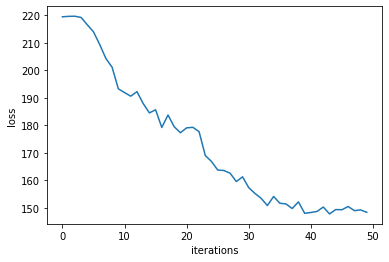

In [21]:
fit2(model2, 50, train_loader, valid_loader, optimizer2)

Iteration no: 0 loss = 338.60931396484375
Accuracies on train set: tensor(0.6377, device='cuda:0') tensor(0.8054, device='cuda:0') tensor(0.8449, device='cuda:0')
Accuracies on validation set : tensor(0.7500, device='cuda:0') tensor(0.9375, device='cuda:0') tensor(0.9375, device='cuda:0')
Iteration no: 1 loss = 281.9012756347656
Accuracies on train set: tensor(0.7611, device='cuda:0') tensor(0.8070, device='cuda:0') tensor(0.8813, device='cuda:0')
Accuracies on validation set : tensor(0.8750, device='cuda:0') tensor(0.9062, device='cuda:0') tensor(0.9688, device='cuda:0')
Iteration no: 2 loss = 258.5781555175781
Accuracies on train set: tensor(0.7975, device='cuda:0') tensor(0.8117, device='cuda:0') tensor(0.8940, device='cuda:0')
Accuracies on validation set : tensor(0.8646, device='cuda:0') tensor(0.9062, device='cuda:0') tensor(0.9062, device='cuda:0')
Iteration no: 3 loss = 253.59710693359375
Accuracies on train set: tensor(0.8228, device='cuda:0') tensor(0.7753, device='cuda:0') t

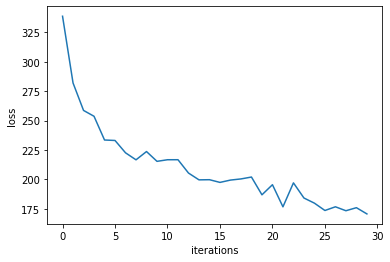

In [22]:
fit(model1, model2, model3, 30, train_loader, valid_loader, optimizer1, optimizer2, optimizer3)

In [23]:
model1.eval()    
model2.eval()    
model3.eval()    
with torch.no_grad():
    test_acc=0
    for xb_test, yb_test in test_loader:
        xb_test = xb_test.to(device)
        yb_test = yb_test.to(device)
        pred_test1 = model1(xb_test.float())
        pred_test1.to(device)
        pred_test2 = model2(xb_test.float())
        pred_test2.to(device)
        pred_test3 = model3(xb_test.float())
        pred_test3.to(device)
        test_acc += (accuracy(pred_test1, yb_test[:,0]) + accuracy(pred_test2, yb_test[:,1]) + accuracy(pred_test3, yb_test[:,2]))/3
    print("Accuracy of test set :", test_acc/len(test_loader))

Accuracy of test set : tensor(0.9688, device='cuda:0')
